    Pré-processamento

In [1]:
import pandas as pd
import openpyxl
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Pré Processamento

#Mapeamento de Area Metropolitana
def mapeamento(row):
    if row['EST_MSA'] == 'New York-Newark-Jersey City, NY-NJ-PA Metro Area':
        return 35620
    elif row['EST_MSA'] == 'Detroit-Warren-Dearborn, MI Metro Area':
        return 19820
    elif row['EST_MSA'] == 'Los Angeles-Long Beach-Anaheim, CA Metro Area':
        return 31080
    elif row['EST_MSA'] == 'Chicago-Naperville-Elgin, IL-IN-WI Metro Area':
        return 16980
    elif row['EST_MSA'] == 'Dallas-Fort Worth-Arlington, TX Metro Area':
        return 19100
    elif row['EST_MSA'] == 'Houston-The Woodlands-Sugar Land, TX Metro Area':
        return 26420
    elif row['EST_MSA'] == 'Washington-Arlington-Alexandria, DC-VA-MD-WV Metro Area':
        return 47900
    elif row['EST_MSA'] == 'Miami-Fort Lauderdale-Pompano Beach, FL Metro Area':
        return 33100
    elif row['EST_MSA'] == 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD Metro Area':
        return 37980
    elif row['EST_MSA'] == 'Atlanta-Sandy Springs-Alpharetta, GA Metro Area':
        return 12060
    elif row['EST_MSA'] == 'Phoenix-Mesa-Chandler, AZ Metro Area':
        return 38060
    elif row['EST_MSA'] == 'Boston-Cambridge-Newton, MA-NH Metro Area':
        return 14460
    elif row['EST_MSA'] == 'San Francisco-Oakland-Berkeley, CA Metro Area':
        return 41860
    elif row['EST_MSA'] == 'Riverside-San Bernardino-Ontario, CA Metro Area':
        return 40140
    elif row['EST_MSA'] == 'Seattle-Tacoma-Bellevue, WA Metro Area':
        return 42660
    elif row['EST_MSA'] > 0:
        return row['EST_MSA']
    else:
        return 0

df = pd.read_excel('dataset.xlsx', skiprows=2)
df['EST_MSA'] = df.apply(mapeamento,axis=1)

#Remoção de mês de nascimento para padronização
df['TBIRTH_YEAR'] = df['TBIRTH_YEAR'].astype(str).str.split("-").str[0]

#Mapeamento de Região
def regionMapping(row):
    if row['EST_ST'] in (9,23,25,33,34,36,42,44,50):
        return 1
    elif row['EST_ST'] in (1,5,10,11,12,13,21,22,24,28,37,40,45,47,48,51,54):
        return 2
    elif row['EST_ST'] in (18,17,19,20,26,27,29,31,38,39,46,55):
        return 3
    elif row['EST_ST'] in (2,4,6,8,15,16,30,32,35,41,49,53,56):
        return 4
    else:
        return ""

df['REGION'] = df.apply(regionMapping,axis=1)

#Binarização remoto ou não
def remoteBinary(row):
    if row['TWDAYS_RESP'] in (1,3):
        return 1
    else:
        return 0

df['IS_RMT'] = df.apply(remoteBinary,axis=1)

df.to_excel('resultado.xlsx', index=False)
print("Feito")

Feito


Separação do database - Validação (30%) / Análise Exploratória (10%) / Teste (60%)

In [ ]:
#Esse que tem random_state fica com resultado fixo. Usa so quando for fazer relatorio
#train, temp = train_test_split(df, test_size=0.4, stratify=df['IS_RMT'], random_state=42)
train, temp = train_test_split(df, test_size=0.4, stratify=df['IS_RMT'])
test, explore = train_test_split(temp, test_size=0.25, stratify=temp['IS_RMT'], random_state=42)

# Exportando excel de dados exploratórios p/ análise em Power BI
explore.to_excel('dados_exploratorios.xlsx', index=False)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KNN:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       805
           1       0.69      1.00      0.82      1774

    accuracy                           0.69      2579
   macro avg       0.34      0.50      0.41      2579
weighted avg       0.47      0.69      0.56      2579



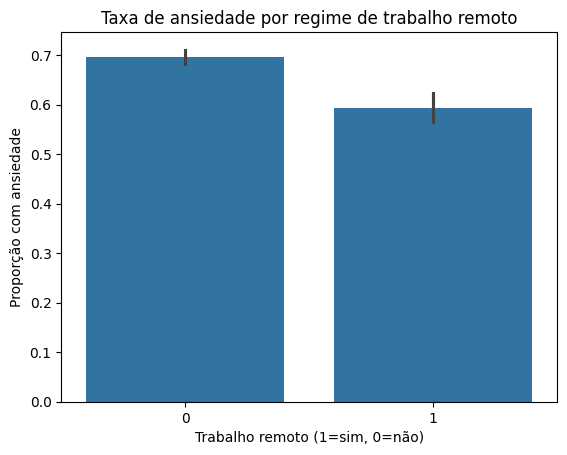

NameError: name 'y_train' is not defined

In [24]:
df_model = train[['IS_RMT', 'ANXIOUS']].copy()

df_model = df_model[df_model['ANXIOUS'].isin([1, 2])]
df_model['ANXIOUS'] = df_model['ANXIOUS'].map({1: 1, 2: 0})  # 1 = ansioso, 0 = não ansioso

X = df_model[['IS_RMT']]  # Trabalho remoto: 1 ou 0
y = df_model['ANXIOUS']



# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Regressão Logística
#logreg = LogisticRegression()
#logreg.fit(X, y)



# Usando test set já separado
X_test = test[['IS_RMT']]
# Filter out rows where 'ANXIOUS' is not 1 or 2 before mapping
test_filtered = test[test['ANXIOUS'].isin([1, 2])].copy()
y_test = test_filtered['ANXIOUS'].map({1: 1, 2: 0})  # Igual à limpeza acima
X_test_filtered = test_filtered[['IS_RMT']]

# Avaliação
print("KNN:\n", classification_report(y_test, knn.predict(X_test_filtered)))
#print("Regressão Logística:\n", classification_report(y_test, logreg.predict(X_test_filtered)))



sns.barplot(data=df_model, x='IS_RMT', y='ANXIOUS')
plt.title("Taxa de ansiedade por regime de trabalho remoto")
plt.xlabel("Trabalho remoto (1=sim, 0=não)")
plt.ylabel("Proporção com ansiedade")
plt.show()



Index(['SCRAM', 'EST_ST', 'EST_MSA', 'REGION', 'TBIRTH_YEAR', 'RHISPANIC',
       'RRACE', 'EEDUC', 'MS', 'EGENID_BIRTH', 'SEXUAL_ORIENTATION_RV',
       'THHLD_NUMPER', 'THHLD_NUMKID', 'TENROLLPUB', 'TENROLLPRV',
       'TENROLLHMSCH', 'INCOME', 'WRKLOSSRV', 'ANYWORK', 'KINDWORK',
       'RSNNOWRKRV', 'TWDAYS', 'TWDAYS_RESP', 'SEEING', 'HEARING', 'MOBILITY',
       'REMEMBERING', 'SELFCARE', 'UNDERSTAND', 'ANXIOUS'],
      dtype='object')